In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtility import *
from scipy.stats import gaussian_kde, norm
import seaborn as sns
import statistics 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import itertools
import matplotlib.ticker as ticker


In [2]:
file = 'map_photons_origin.txt'
x0 = np.genfromtxt(fname = file, skip_header = 1, dtype = 'float', usecols = 0)
x1 = np.genfromtxt(fname = file, skip_header = 1, dtype = 'float', usecols = 1)
x2 = np.genfromtxt(fname = file, skip_header = 1, dtype = 'float', usecols = 2)
t_arrive = np.genfromtxt(fname = file, skip_header = 1, dtype = 'float', usecols = 3)
time  = np.genfromtxt(fname = file, skip_header = 1, dtype = 'float', usecols = 4)
tesc  = np.genfromtxt(fname = file, skip_header = 1, dtype = 'float', usecols = 5)
wave  = np.genfromtxt(fname = file, skip_header = 1, dtype = 'float', usecols = 6)
obser = np.genfromtxt(fname = file, skip_header = 1, dtype = 'int', usecols = 7)

In [6]:
Nph = input('combien de paquets de photons ?')

combien de paquets de photons ? 1.0e+05


In [ ]:
l = 0
for (i,tau) in enumerate(tesc):
    if tau < 0.5:
        l+=1
         #print(X[i], Y[i], Z[i], wave[i], t_arrive[i], time[i], '\n')
print(l, '\n', len(tesc))

In [7]:
x_arrive = []
y_arrive = []
z_arrive = []
l_arrive = [] #observer flag
wave_arrive = []

for (i,tau) in enumerate(tesc):
      if tau < 0.8 and 5<t_arrive[i]:
            x_arrive.append(x0[i])
            y_arrive.append(x1[i])
            z_arrive.append(x2[i])
            l_arrive.append(obser[i])
            wave_arrive.append(wave[i])
    


In [4]:

x_blue_ug_equa = []
x_blue_ug_pola = []

y_blue_ug_equa = []
y_blue_ug_pola = []

z_blue_ug_equa = []
z_blue_ug_pola  = []

x_red_izh_equa = []
x_red_izh_pola = []

y_red_izh_equa = []
y_red_izh_pola = []

z_red_izh_equa = []
z_red_izh_pola = []

x_blue = [x_blue_ug_equa, x_blue_ug_pola]
y_blue = [y_blue_ug_equa, y_blue_ug_pola]
z_blue = [z_blue_ug_equa, z_blue_ug_pola]

x_red = [x_red_izh_equa, x_red_izh_pola]
y_red = [y_red_izh_equa, y_red_izh_pola]
z_red = [z_red_izh_equa, z_red_izh_pola]




for i,w in enumerate(wave_arrive):
    if w< 4700 and l_arrive[i] == 0: 
        x_blue_ug_equa.append(x_arrive[i]/(1e15))
        y_blue_ug_equa.append(y_arrive[i]/(1e15))
        z_blue_ug_equa.append(z_arrive[i]/(1e15))
    if w< 4700 and l_arrive[i] == 1:
        x_blue_ug_pola.append(x_arrive[i]/(1e15))
        y_blue_ug_pola.append(y_arrive[i]/(1e15))
        z_blue_ug_pola.append(z_arrive[i]/(1e15))
    if w > 7480 and l_arrive[i] == 0:
        x_red_izh_equa.append(x_arrive[i]/(1e15))
        y_red_izh_equa.append(y_arrive[i]/(1e15))
        z_red_izh_equa.append(z_arrive[i]/(1e15))
    if w > 7480 and l_arrive[i] == 1:
        x_red_izh_pola.append(x_arrive[i]/(1e15))
        y_red_izh_pola.append(y_arrive[i]/(1e15))
        z_red_izh_pola.append(z_arrive[i]/(1e15))
        
#blue_photons = [x_blue, y_blue]
#red_photons  = [x_red, y_red]


#color = ['blue', 'red']

#data = [blue_photons, red_photons]


    

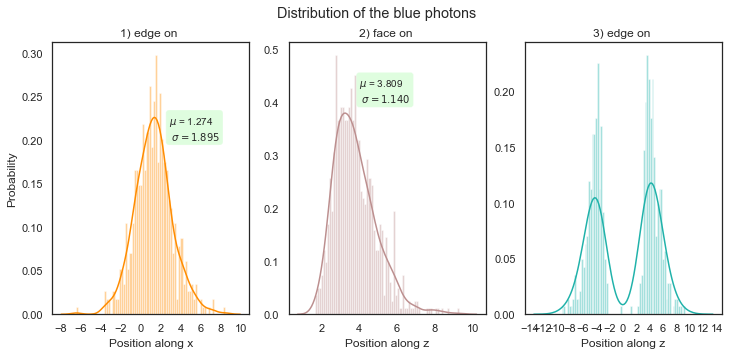

In [12]:
data   = [x_blue[0], z_blue[1], z_blue[0]]
labels  = ['Position along x', 'Position along z', 'Position along z' ]
titles = ['edge on','face on', 'edge on']
color  = ['darkorange', 'rosybrown', 'lightseagreen']
mu_0   = statistics.mean(x_blue[0])
mu_1   = statistics.mean(z_blue[1])


sigma_0 = statistics.stdev(x_blue[0])
sigma_1  = statistics.stdev(z_blue[1])



minor_locator = AutoMinorLocator(2)

sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(1,3, figsize=(12,5))

for (i, data, c, label, title) in zip(range(len(data)), data, color, labels, titles):
    sns.distplot(data, bins = 70, color = c , ax = ax[i], kde =True )
    ax[i].set_xlabel(label)
    
    ax[i].set_title(f'{i+1}) {title} ')
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(2))
   # ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    if i ==0:
        ax[i].text(2.8, 0.2,f'$\mu$ ={mu_0: .3f} \n $\sigma ={sigma_0: .3f} $', bbox=dict(facecolor='palegreen', alpha=0.3, boxstyle='round'), size=10)
        ax[i].set_ylabel('Probability')

    if i ==1:
        ax[i].text(4, 0.4,f'$\mu$ ={mu_1: .3f} \n $\sigma ={sigma_1: .3f} $', bbox=dict(facecolor='palegreen', alpha=0.3, boxstyle='round'), size=10)

output = f'distribution_blue_photons_nph{Nph}.pdf'
fig.suptitle('Distribution of the blue photons')
plt.savefig(output, bbox_inches='tight')

In [19]:
print(np.average(x_red[0]), np.average(x_blue[0]))

1.515293571858241 1.2741763478664192


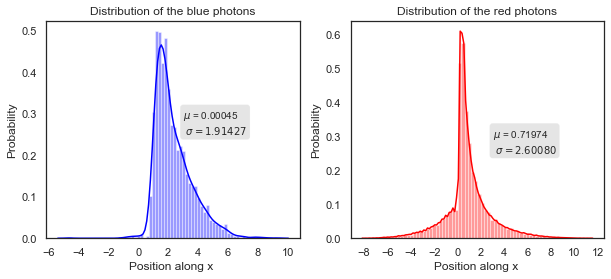

In [14]:
color  = ['blue', 'red']
data   = [z_blue[1], z_red[1]]
titles = ['Distribution of the blue photons', 'Distribution of the red photons']

mu_red  = statistics.mean(x_red[0])
mu_blue = statistics.mean(x_blue[0])
mu      = [mu_blue, mu_red]

sigma_blue = statistics.stdev(x_blue[0])
sigma_red  = statistics.stdev(x_red[0])
sigma      = [sigma_blue, sigma_red] 

minor_locator = AutoMinorLocator(2)

sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(1,2, figsize=(10,4))

for (i, data, c, title, mu, sigma) in zip(range(len(data)), data, color, titles, mu, sigma):
    sns.distplot(data, bins = 70, color = c , ax = ax[i], kde =True )
#mu, sigma = statistics.mean(x_blue_ug), statistics.stdev(x_blue_ug)
#print(mu, sigma)
    ax[i].set_xlabel('Position along x ')
    ax[i].set_ylabel('Probability')
    ax[i].set_title(title)
    
    ax[i].text(3, 0.25,f'$\mu$ ={mu: .5f} \n $\sigma ={sigma: .5f} $', bbox=dict(facecolor='grey', alpha=0.2, boxstyle='round'), size=10)

    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))

output = f'distribution_blue_photons_nph{Nph}.pdf'


    
plt.savefig(".pdf", bbox_inches='tight')
#print([mu_blue - 2*np.std(x_blue_ug), mu_blue + 2*np.std(x_blue_ug)], '\n', [mu_red - 2*np.std(x_red_izh), mu_red + 2*np.std(x_red_izh)])

In [ ]:
rng = np.random.RandomState(0)
t = np.concatenate([-5 + 1.8 * rng.standard_cauchy(500),
                    -4 + 0.8 * rng.standard_cauchy(2000),
                    -1 + 0.3 * rng.standard_cauchy(500),
                    2 + 0.8 * rng.standard_cauchy(1000),
                    4 + 1.5 * rng.standard_cauchy(1000)])
data  = [x_blue_ug, x_red_izh]


# truncate to a reasonable range
t = t[(t > -15) & (t < 15)]
color = ['blue', 'red']

# draw histograms with two different bin widths
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
for i, d, c in zip(range(len(data)), data, color):
    ax[i] = sns.distplot(d, bins= 40)
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('P(t)')
    #ax[i].set_title('plt.hist(t, bins={0})'.format(bins),
                    #fontdict=dict(family='monospace'))

In [ ]:

color = ['red', 'blue']

data = [red_photons, blue_photons]
ax = plt.subplot(111)

for data, color in zip(data, color):
    x,y = data
    ax.scatter(x, y, c=color)

In [ ]:
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=26)
dt  = ax.scatter(x_arrive,y_arrive,wave_arrive, cmap='plasma')
col =  plt.colorbar(dt)
#col.set_label(r'$|\Delta \log P| \, (\rm{dyn/cm^{2}})$', size=26)
#ax.set_xlabel(r'$\log \rho \, \rm{(g/cm^{3})}$', size=26)
#ax.set_ylabel(r'$\log T \, \rm{(K)}$', size=26)
col.ax.tick_params(labelsize=22)
cont = ax.contour(X,Y, W)
cont.clabel(fontsize=10)
#plt.gca().invert_yaxis()        

plt.show()

In [ ]:
X, Y = np.meshgrid(np.unique(x_arrive), np.unique(y_arrive))
W = np.zeros(np.shape(X))

In [ ]:
test1 = [[True, False], [False, False]]
test2 = [[True, False], [False, False]]
#whereX_and_Y = np.logical_and(test1, test2)
#print(whereX_and_Y)
print(wave_arrive)

In [ ]:
size1 = np.shape(X)[0]
size2 = np.shape(Y)[0]
for index1, x, y in zip(range(size1), X, Y):
    for index2, valx, valy in zip(range(size2), x, y):
        whereX = x_arrive == valx
        whereY = y_arrive == valy
        whereX_and_Y = np.logical_and(whereX, whereY)
        if np.shape(np.array(np.where(whereX_and_Y))[0])[0]!=0:
            position = np.array(np.where(whereX_and_Y))[0][0]
            valw = wave_arrive[position]
            print(valw)
            W[index1, index2] = valw
            print(W[index1, index2])

In [ ]:
whereX

In [ ]:
np.logical_and(True, False)